# Linear Regression with Multiple variables

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
datafile = '/home/balerion/Desktop/leetcode_Ai/Ai/Andrew-NG-Notes/Machine Learning notebooks By Andrew NG/ex1/data/ex1data2.txt'

cols = np.loadtxt(datafile , delimiter=','  ,usecols=(0,1,2) , unpack=True)
X = np.transpose(np.array(cols[:-1]))
Y = np.transpose(np.array(cols[-1:]))
m = Y.size # m = X[:,1].size
# print(m)

#Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)
# print(X[:,0])

Quick Visualisation of data

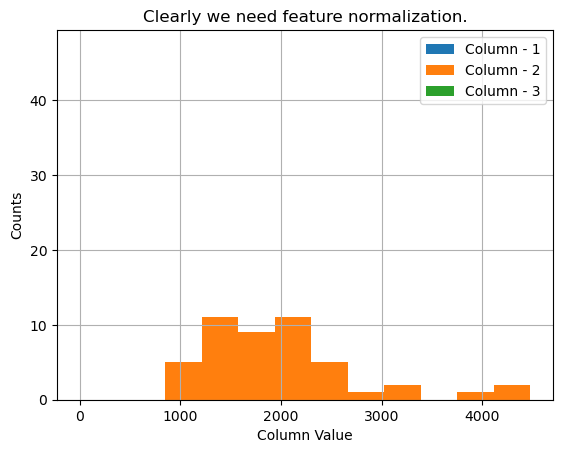

In [13]:
plt.grid(True)
plot_ = plt.hist(X[:,0] , label = "Column - 1")
plot_ = plt.hist(X[:,1] , label = "Column - 2")
plot_ = plt.hist(X[:,2] , label = "Column - 3")
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
plt.legend()
# plt.show()

# Normalization or Standardization of Dataset

Feature normalizing the columns (subtract mean, divide by standard deviation)












### Basic Fn for normalizing dataset

In [5]:
# def feature_normalize(X):

#     # Normalizes the features in X.
#     # Returns a tuple (X_norm, mu, sigma) where:
#     # X_norm is the normalized version of X,
#     # mu is the mean of each feature,
#     # sigma is the standard deviation of each feature.
    
#     mu = np.mean(X, axis=0)
#     sigma = np.std(X, axis=0)
#     X_norm = (X - mu) / sigma
#     return X_norm, mu, sigma

In [14]:
stored_feature_means, stored_feature_stds = [], []
Xnorm = X.copy()
for icol in range(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:,icol]))

# print(stored_feature_means)
    #Skip the first column
    if not icol: continue
    Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]
    
    # print(Xnorm)

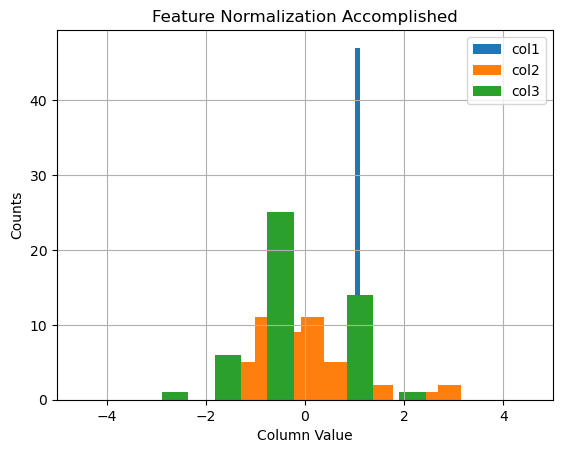

In [15]:
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(Xnorm[:,0],label = 'col1')
dummy = plt.hist(Xnorm[:,1],label = 'col2')
dummy = plt.hist(Xnorm[:,2],label = 'col3')
plt.title('Feature Normalization Accomplished')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

### Fn to calculate Gradient Descent (mentioned in earlier ex)

In [24]:
# # linear hypothesis function
def h(theta , X):
    return np.dot(X , theta)

#Compute cost function
def computeCost(mytheta,X,Y):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    
    return float((1./(2*m)) * np.dot((h(mytheta,X)-Y).T,(h(mytheta,X)-Y)))

# initial_theta = np.zeros((X.shape[1] , 1))  # X.shape[1] --> number of columns in X = 2 shape of initial_theta = 2 X 1
# print (computeCost(initial_theta,X,y))

iterations = 1500 # more the iteration better the result
alpha = 0.01 



def descendGradient(X , start_theta = np.zeros(2)):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    """
    
    theta = start_theta
    jvec = []
    thetahistory = []
    
    for _ in range(iterations):
        temptheta = theta
        
        jvec.append(computeCost(theta,X,Y))
        thetahistory.append(list(theta[:,0]))
        for j in range(len(temptheta)):
            temptheta[j] = theta[j] - (alpha/m)*np.sum((h(theta,X) - Y)*np.array(X[:,j]).reshape(m,1))
        theta = temptheta
    return theta, thetahistory, jvec

def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")

## Running Gradient Descent for multiple variable

Initial theta still set to zeros
(Note! This doesn't work unless we feature normalize!)

### "overflow encountered in multiply"

When features have large values, the intermediate calculations in gradient descent can become very large, leading to overflow. This is why feature normalization is crucial.


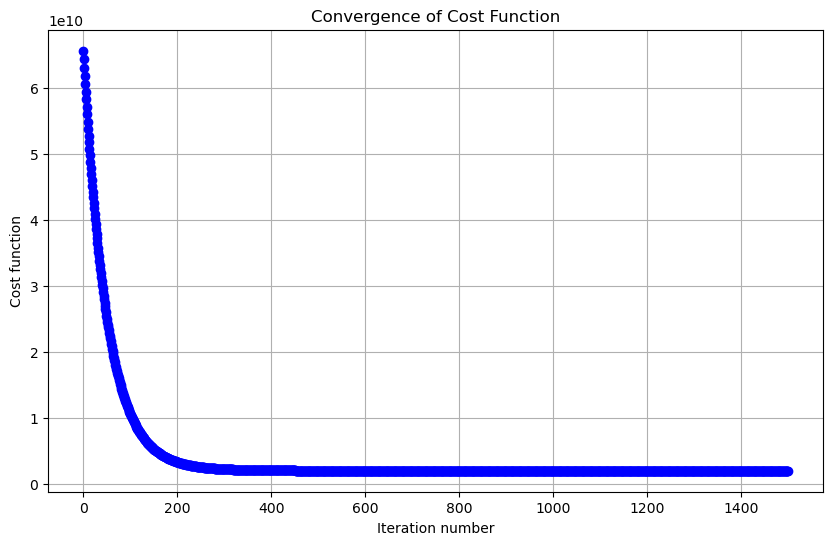

In [25]:
initial_theta = np.zeros((Xnorm.shape[1],1))
theta, thetahistory, jvec = descendGradient(Xnorm,initial_theta)

plotConvergence(jvec)

In [31]:
print("Check of result: What is price of house with 1650 square feet and 3 bedrooms?")

x_test = np.array([2000.,4.])

# feature normalization
xtestscaled = [(x_test[x]-stored_feature_means[x+1])/stored_feature_stds[x+1] for x in range(len(x_test))]

xtestscaled.insert(0,1) # inserting 1 at 1st index

print("$%0.2f"%float(h(theta, xtestscaled)))


Check of result: What is price of house with 1650 square feet and 3 bedrooms?
$333150.87


To calculate the equation y = b + m1x1 + m2x2 + . . . . . for a given matrix X (containing values of x) and Y (containg values of y) we use normal equation : 

theta = inverse(transpose(X)*X) * transpose(X) * Y


In [29]:
def normal_eq(X,Y):
    
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y) # this return theta

In [32]:
print("Normal equation prediction for price of house with 1650 square feet and 3 bedrooms")

print("$%0.2f"%float(h(normal_eq(X,Y),[1.,2000.,4.])))

Normal equation prediction for price of house with 1650 square feet and 3 bedrooms
$333067.18
